![Colegio Bourbaki](./Images/Bourbaki.png)

## Machine Learning

### Introducción a Aprendizaje por Refuerzo

### Librerias

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

### Bandidos Multibrazos

El problema del bandido multi-brazos es un dilema clásico de la teoría de la decisión y el aprendizaje por refuerzo. Su nombre se debe a la imagen de un jugador en una fila de máquinas tragamonedas (cada una de ellas denominada "bandido con un brazo"), que debe decidir a qué máquinas jugar, cuántas veces jugar a cada una y en qué orden hacerlo, con el objetivo de maximizar su recompensa total. 

Cada máquina tiene una probabilidad de pago diferente y desconocida, y el jugador intenta descubrir la máquina con la mejor tasa de pago mediante ensayo y error.

Este problema refleja la relación entre exploración y explotación: la necesidad de equilibrar la exploración de nuevas opciones para descubrir sus posibles premios con la explotación de opciones conocidas que han dado buenos premios en el pasado.

Aplicaciones

Los bandidos de brazos múltiples son ampliamente aplicables en diversos dominios, entre ellos:

* **Publicidad en línea:** Optimización de las tasas de clics seleccionando dinámicamente qué anuncios mostrar a los usuarios en función de su historial de interacción.

* **Pruebas A/B:** Determinación eficiente de la mejor variante entre múltiples opciones con tráfico limitado asignando dinámicamente más tráfico a las variantes con mejor rendimiento.

* **Problemas de asignación de recursos:** Asignación de recursos limitados (como presupuesto o tiempo) entre diferentes canales o proyectos para maximizar el rendimiento total.

![Colegio Bourbaki](./Images/Multiarmedbandits.png)

Parámetros del problema:

In [86]:
n_arms = 20 # Arms or machines
arm_probabilities = np.random.rand(n_arms) # Probabilities of winning for each
n_trials = 1000 # Number of trials

In [87]:
arm_probabilities

array([0.77719436, 0.25663114, 0.14995528, 0.14962054, 0.51368055,
       0.8716552 , 0.43060933, 0.17945284, 0.21331326, 0.58319461,
       0.2526142 , 0.53906326, 0.05730348, 0.55416314, 0.49434265,
       0.30049988, 0.34198648, 0.12294068, 0.83247623, 0.92970624])

**IMPORTANTE:** TENER EN CUENTA QUE LA INICIALIZACIÓN AL AZAR DE LAS RECOMPENSAS VA A TENER IMPACTO SOBRE LOS RESULTADOS FINALES

In [88]:
winning_probs = arm_probabilities
rewards = np.zeros(n_trials)
chosen_arms = np.random.choice(range(n_arms), size=n_trials) # Simulate pulling each arm n_trials/10 times randomly

In [89]:
for i in range(n_trials):
    # Randomly select an arm to pull
    arm = chosen_arms[i]
    # Simulate pulling the arm
    if np.random.rand() < winning_probs[arm]:
        rewards[i] = 1  # Win
    else:
        rewards[i] = 0  # Lose

In [90]:
# Calculate total reward
total_mab_rewards = np.sum(rewards)

In [91]:
print(f"Total Reward: {total_mab_rewards} out of {n_trials} trials")
# Calculate winning probability estimates for each arm
print(f"Winning Probability Estimates: {[np.mean(rewards[chosen_arms == i]) for i in range(len(winning_probs))]}") 

Total Reward: 426.0 out of 1000 trials
Winning Probability Estimates: [0.7906976744186046, 0.2962962962962963, 0.2391304347826087, 0.140625, 0.45454545454545453, 0.78, 0.32075471698113206, 0.19607843137254902, 0.21818181818181817, 0.5306122448979592, 0.32558139534883723, 0.6296296296296297, 0.10204081632653061, 0.5740740740740741, 0.42105263157894735, 0.28846153846153844, 0.5, 0.10810810810810811, 0.782608695652174, 0.9761904761904762]


Estas estimaciones representan las tasas de éxito observadas para cada brazo en función de los resultados de los ensayos, reflejando la frecuencia con la que cada brazo tuvo éxito cuando fue elegido. Las diferencias en estas estimaciones ponen de manifiesto la variabilidad en las recompensas proporcionadas por cada brazo, con algunos brazos  mostrando altas tasas de éxito y otros mostrando bajas tasas de éxito.

Esta sencilla simulación ilustra el proceso de interacción con un bandido de múltiples brazos, en el que cada brazo representa una decisión u opción diferente con su propia probabilidad de obtener una recompensa. 

Pueden aplicarse estrategias como ε-greedy, UCB (Upper Confidence Bound) o Thompson Sampling para equilibrar la exploración de todos los brazos con la explotación de los más gratificantes, maximizando así la recompensa total.

### Estrategias Codiciosas (Greedy Strategies)

En el contexto de los bandidos de varios brazos, la **estrategia codiciosa** consiste en seleccionar siempre el brazo con la recompensa estimada más alta basada en pruebas anteriores. La recompensa estimada suele ser la recompensa media que ese brazo ha dado hasta ahora. Este enfoque prima la explotación sobre la exploración, ya que elige sistemáticamente el brazo que se cree que ofrece la mejor recompensa, sin tener en cuenta el potencial de los brazos subexplorados.

* **Desventajas:** El principal inconveniente de la estrategia codiciosa es su falta de exploración. Si un brazo obtiene buenos resultados en las pruebas iniciales, la estrategia podría seguir seleccionándolo, ignorando potencialmente otros brazos que podrían tener mayores recompensas pero que no se han explorado lo suficiente como para demostrar su valor.
Estrategia ε-Greedy

La **estrategia ε-Greedy** añade un mecanismo de exploración a la estrategia Greedy. Con una pequeña probabilidad ε (0 < ε < 1), selecciona un brazo al azar, y con probabilidad 1-ε, selecciona el brazo con la recompensa estimada más alta. Esto permite a la estrategia explorar todos los brazos a lo largo del tiempo y, al mismo tiempo, explotar el brazo que se cree que ofrece la mejor recompensa.

* **Ventajas:** Esta estrategia equilibra la exploración y la explotación, garantizando que todos los brazos tengan la oportunidad de ser explorados mientras se sigue explotando principalmente el brazo más conocido. Es un planteamiento sencillo pero eficaz que puede adaptarse a las circunstancias cambiantes.

In [92]:
def simulate_bandit(strategy, epsilon=None):
    estimates = np.zeros(n_arms)  # Estimated winning probabilities
    counts = np.zeros(n_arms)  # Counts of times each arm was pulled
    rewards = np.zeros(n_trials)
    
    for i in range(n_trials):
        if strategy == "greedy" or (strategy == "epsilon-greedy" and np.random.rand() > epsilon):
            arm = np.argmax(estimates) if i >= n_arms else i  # Explore each arm once before exploiting
        else:
            arm = np.random.randint(0, n_arms)  # Exploration step in epsilon-greedy
        
        # Simulate pulling the selected arm
        reward = np.random.rand() < winning_probs[arm]
        counts[arm] += 1
        rewards[i] = reward
        
        # Update the estimated win rate of the selected arm
        estimates[arm] += (reward - estimates[arm]) / counts[arm]
    
    return rewards

In [93]:
# Simulate Greedy and ε-Greedy strategies
greedy_rewards = simulate_bandit("greedy")
epsilon_greedy_rewards = simulate_bandit("epsilon-greedy", epsilon=0.5)

In [94]:
# Calculate total rewards
total_greedy_rewards = np.sum(greedy_rewards)
total_epsilon_greedy_rewards = np.sum(epsilon_greedy_rewards)

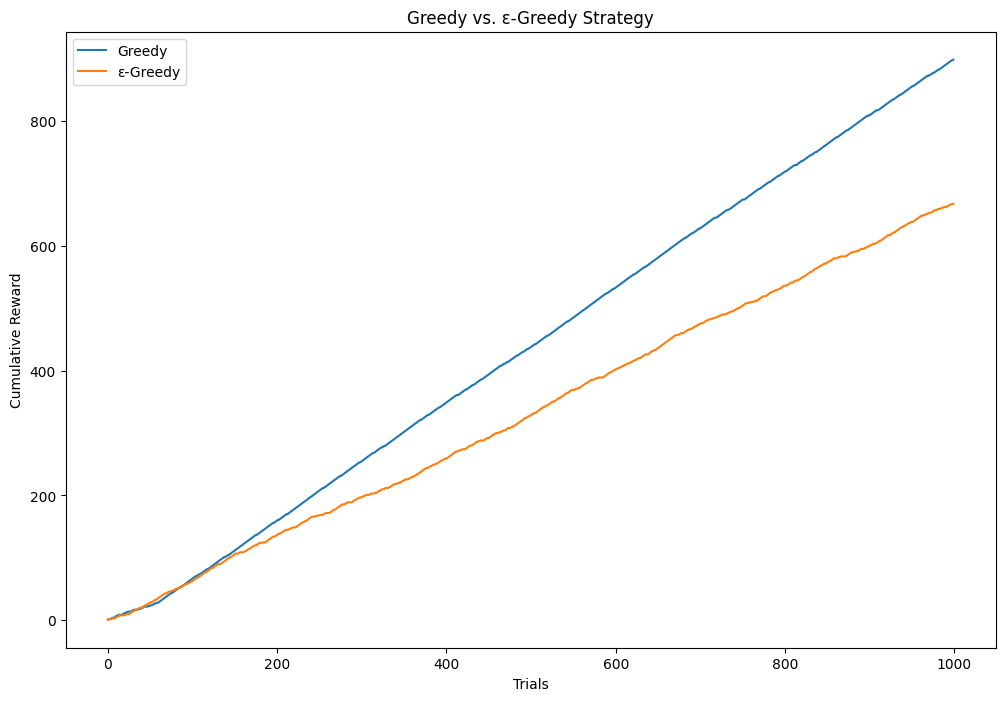

Total Greedy Reward: 898.0
Total ε-Greedy Reward: 667.0


In [95]:
# Plotting the cumulative rewards for comparison
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(greedy_rewards), label="Greedy")
plt.plot(np.cumsum(epsilon_greedy_rewards), label="ε-Greedy")
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Greedy vs. ε-Greedy Strategy")
plt.legend()
plt.show()
print(f"Total Greedy Reward: {total_greedy_rewards}")
print(f"Total ε-Greedy Reward: {total_epsilon_greedy_rewards}")

Entonces, simulamos un escenario en el que se aplican las estrategias Greedy y ε-Greedy a un problema de bandidos con múltiples brazos. Tratamos de demostrar el equilibrio inherente entre exploración y explotación, mostrando cómo la estrategia ε-Greedy introduce un mecanismo de exploración mediante la selección ocasional de un brazo al azar, lo que puede conducir a una mayor recompensa total mediante el descubrimiento de mejores opciones que el brazo inicialmente percibido como el mejor.

### Inferencia Bayesiana Revisited

Para ilustrar los fundamentos de la inferencia bayesiana, incluido el teorema de Bayes y los conceptos de a priori, verosimilitud y a posteriori, veremos un ejemplo sencillo. La inferencia bayesiana es un método de inferencia estadística en el que se utiliza el teorema de Bayes para actualizar la estimación de la probabilidad de una hipótesis a medida que se dispone de más pruebas o información.

Teorema de Bayes

El teorema de Bayes describe la probabilidad de que se produzca un suceso, basándose en el conocimiento previo de las condiciones que podrían estar relacionadas con el suceso. Se expresa matemáticamente como

$P(A∣B)=P(B∣A)⋅P(A)/P(B)$

Donde:

* $P(A∣B)$ es la probabilidad posterior de A dada B: la probabilidad de que la hipótesis A sea cierta dado que B es cierta.
* $P(B∣A)$ es la probabilidad: la probabilidad de observar B dado que la hipótesis A es cierta.
* $P(A)$ es la probabilidad a priori de A: la estimación inicial de la probabilidad de que la hipótesis A sea cierta.
* $P(B)$ es la probabilidad marginal de B: la probabilidad total de observar B bajo todas las hipótesis.

Prior, Probabilidad y Posterior

* A priori: Representa nuestra creencia inicial sobre la probabilidad de una hipótesis antes de observar ningún dato.
* Probabilidad: Representa el grado de probabilidad de los datos observados, dada nuestra hipótesis.
* Posterior: Representa la creencia actualizada sobre nuestra hipótesis después de tener en cuenta los nuevos datos.

In [96]:
# Function to update our beliefs
def bayesian_update(prior_alpha, prior_beta, heads, tails):
    """
    Update the Beta distribution parameters (our beliefs) based on new evidence.
    """
    posterior_alpha = prior_alpha + heads
    posterior_beta = prior_beta + tails
    return posterior_alpha, posterior_beta

In [97]:
# Initial beliefs: P(H) = 0.5, modeled as Beta(1,1)
prior_alpha, prior_beta = 1, 1

In [98]:
# Simulate observing 10 heads and 5 tails
heads_observed, tails_observed = 10, 5

In [99]:
# Update beliefs
posterior_alpha, posterior_beta = bayesian_update(prior_alpha, prior_beta, heads_observed, tails_observed)

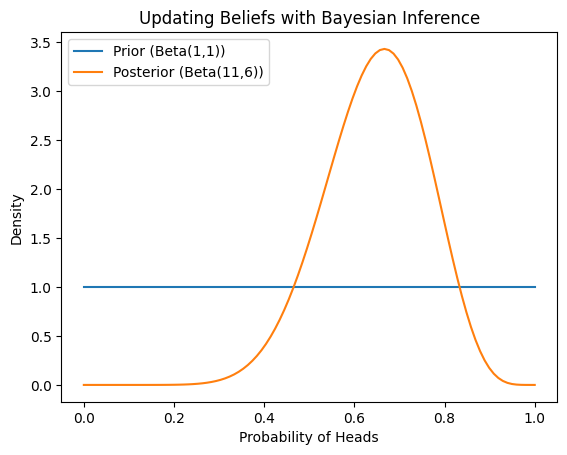

In [100]:
# Plot the prior and posterior distributions
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, prior_alpha, prior_beta), label='Prior (Beta(1,1))')
plt.plot(x, beta.pdf(x, posterior_alpha, posterior_beta), label=f'Posterior (Beta({posterior_alpha},{posterior_beta}))')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.title('Updating Beliefs with Bayesian Inference')
plt.legend()
plt.show()

Definimos una función bayesian_update que toma los parámetros de la distribución Beta a priori y el número observado de caras y secas, y luego actualiza los parámetros para formar la distribución a posteriori. Trazamos las distribuciones a priori y a posteriori para visualizar cómo cambia nuestra creencia sobre la probabilidad de que la moneda salga cara con las nuevas pruebas. Inicialmente, partimos de una creencia uniforme (Beta(1,1)), que refleja la misma probabilidad de cara y cruz. Después de observar 10 caras y 5 secas, nuestra distribución posterior cambia, indicando una creencia revisada de que es más probable que la moneda salga cara.

### Muestreo de Thompson

El muestreo de Thompson es un algoritmo probabilístico que se utiliza en problemas de bandidos con múltiples brazos para equilibrar la compensación entre exploración y explotación mediante la inferencia bayesiana. Selecciona el brazo del que se va a tirar tomando muestras de las distribuciones de probabilidad posteriores de las recompensas de cada brazo y eligiendo después el brazo con la muestra más alta. Este enfoque permite un equilibrio dinámico entre la exploración de brazos con recompensas inciertas y la explotación de brazos que han demostrado ser gratificantes.

**Descripción del algoritmo:**

Para cada brazo, se mantiene una distribución posterior de la tasa de recompensa. Esto se modela típicamente con una distribución Beta, que se actualiza con cada tirada del brazo basándose en el éxito (recompensa recibida) o fracaso (sin recompensa).

En cada punto de decisión, se toma una muestra de las distribuciones posteriores de todos los brazos.

Se selecciona el brazo con el valor muestral más alto. Este paso equilibra intrínsecamente la exploración y la explotación: los brazos con menos certeza (distribuciones posteriores más amplias) tienen una oportunidad de ser seleccionados debido a la variabilidad de sus muestras, mientras que los brazos con recompensas estimadas más altas tienen más probabilidades de ser muestreados con valores más altos.

Entonces, se actualiza la distribución posterior del brazo seleccionado en función del resultado observado.

**Ventajas sobre ε-Greedy:**

* **Equilibrio dinámico entre exploración y explotación:** El muestreo de Thompson ajusta de forma natural el nivel de exploración en función de la incertidumbre de la distribución de recompensas de cada brazo. Los brazos con mayor incertidumbre se exploran más, sin necesidad de una tasa de exploración fija como en ε-greedy.

* **Eficacia:** Se ha demostrado que el muestreo de Thompson converge más rápido hacia el brazo o brazos óptimos que ε-greedy, especialmente en escenarios con muchos brazos o cuando las diferencias en las recompensas de los brazos son sutiles.

* **Rendimiento en entornos variados:** Funciona bien tanto en entornos estacionarios como no estacionarios, ya que la distribución posterior se actualiza continuamente para reflejar la información más reciente.

In [101]:
# Initialize parameters for the Beta distributions
alphas = np.ones(n_arms)  
betas = np.ones(n_arms)

# Store the outcomes
outcomes = np.zeros(n_trials)
chosen_arms = np.zeros(n_trials)

In [102]:
for i in range(n_trials):
    # Sample from the posterior distribution of each arm
    sampled_theta = np.random.beta(alphas, betas)
    
    # Choose the arm with the highest sampled value
    chosen_arm = np.argmax(sampled_theta)
    chosen_arms[i] = chosen_arm
    
    # Simulate pulling the chosen arm
    reward = np.random.rand() < winning_probs[chosen_arm]
    outcomes[i] = reward
    
    # Update the posterior distribution for the chosen arm
    alphas[chosen_arm] += reward
    betas[chosen_arm] += 1 - reward

In [103]:
# Calculate the total reward
thompson_rewards = np.sum(outcomes)

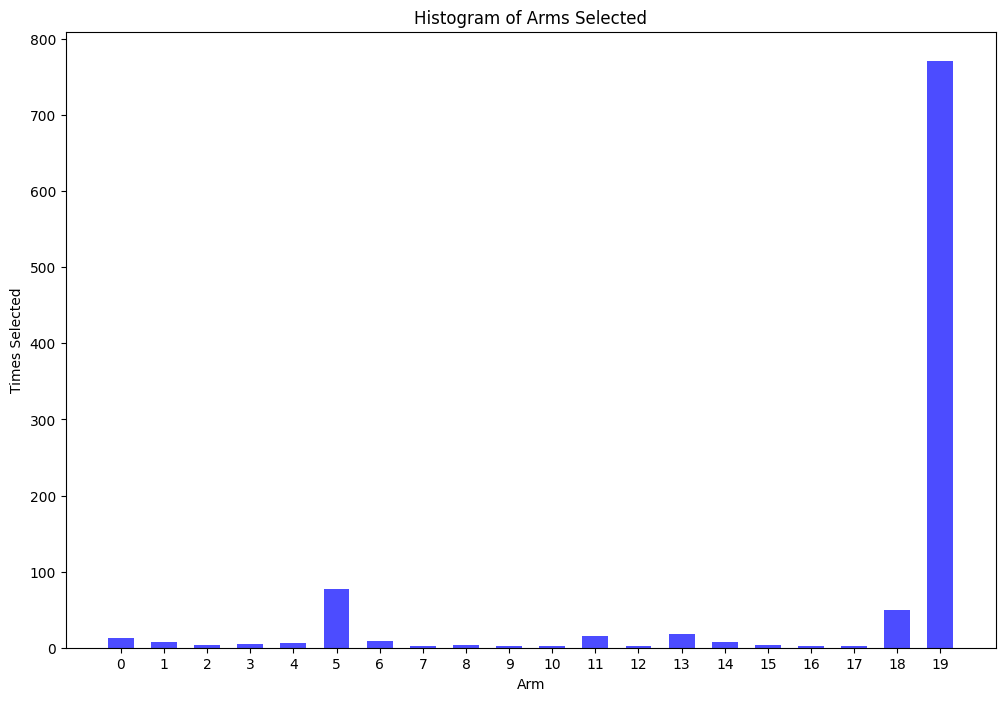

Total Reward: 881.0


In [104]:
# Visualization
plt.figure(figsize=(12, 8))
plt.hist(chosen_arms, bins=np.arange(n_arms+1) - 0.5, rwidth=0.6, color='blue', alpha=0.7)
plt.title('Histogram of Arms Selected')
plt.xlabel('Arm')
plt.ylabel('Times Selected')
plt.xticks(range(n_arms))
plt.show()
print(f"Total Reward: {thompson_rewards}")

Entonces, demostramos el Muestreo de Thompson en acción, mostrando cómo se seleccionan los brazos a lo largo de los ensayos basándose en las distribuciones posteriores actualizadas dinámicamente. El histograma de brazos seleccionados visualiza la preferencia del algoritmo por los brazos a medida que aprende cuáles son más gratificantes. Este ejemplo subraya la eficacia del Muestreo de Thompson para equilibrar la exploración y la explotación adaptándose al rendimiento observado de cada brazo.

### Comparacion de Estrategias:

Vamos a visualizar cómo se comporta cada estrategia en función de los parámetros del problema:

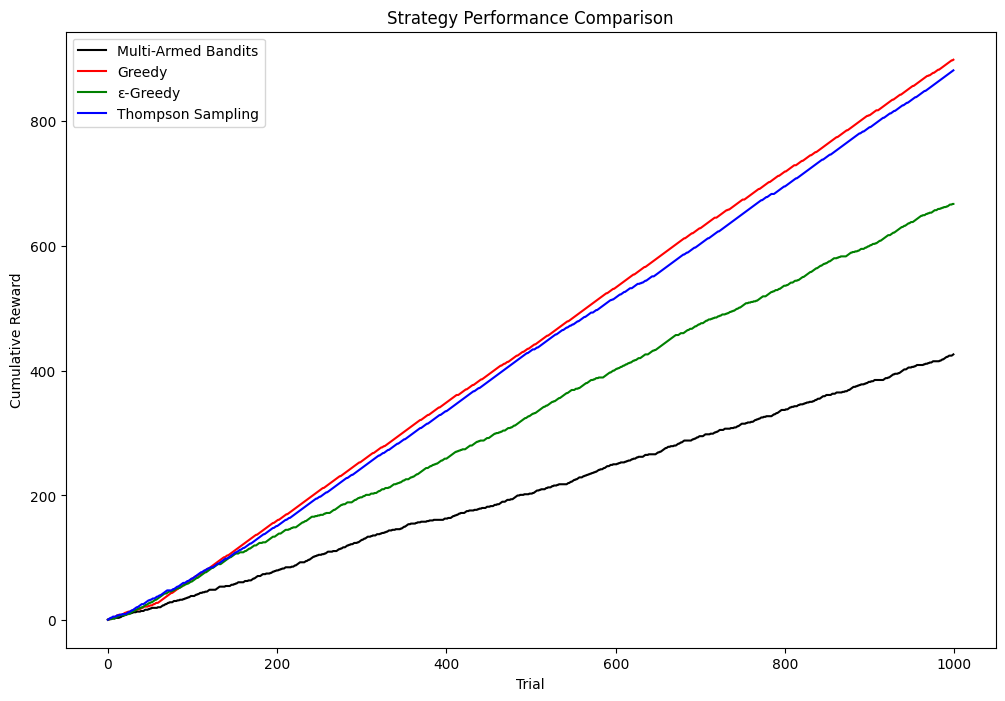

In [105]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(rewards), label='Multi-Armed Bandits', color='black')
plt.plot(np.cumsum(greedy_rewards), label='Greedy', color='red')
plt.plot(np.cumsum(epsilon_greedy_rewards), label='ε-Greedy', color='green')
plt.plot(np.cumsum(outcomes), label='Thompson Sampling', color='blue')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.title('Strategy Performance Comparison')
plt.legend()
plt.show()

Vemos un análisis comparativo mediante la simulación del rendimiento de las estrategias MultiArmed-Bandits, Greedy, ε-Greedy y Thompson Sampling. 

El gráfico de recompensas acumuladas a lo largo del tiempo demuestra visualmente la eficiencia y eficacia de cada enfoque. 

En un experimento bien realizado, esperaremos que el Muestreo de Thompson muestre un equilibrio competitivo entre exploración y explotación, superando potencialmente a las estrategias Greedy y ε-Greedy al sortear mejor la disyuntiva exploración-explotación.

### Conclusión

La exploración de los problemas de bandidos armados múltiples y sus soluciones, en particular a través de las estrategias de muestreo de Thompson, Greedy y ε-Greedy, ofrece una visión profunda de la toma de decisiones en condiciones de incertidumbre. Estas estrategias proporcionan marcos para equilibrar la exploración de nuevas oportunidades con la explotación de acciones gratificantes conocidas, un dilema que impregna muchos aspectos del aprendizaje automático, la inteligencia artificial y otros ámbitos.

Puntos clave

* Exploración frente a explotación: El equilibrio entre la exploración de nuevas opciones y la explotación de las conocidas es crucial en entornos dinámicos en los que el objetivo es maximizar las recompensas a lo largo del tiempo.

* Muestreo de Thompson: Este enfoque bayesiano ajusta dinámicamente el equilibrio entre exploración y explotación en función del rendimiento observado de cada opción. A menudo supera a estrategias más sencillas como Greedy y ε-Greedy al aprovechar la incertidumbre en las estimaciones de la probabilidad de recompensa de cada brazo.

* Estrategias Greedy y ε-Greedy: Aunque son más sencillas y a veces menos eficaces que el muestreo de Thompson, estas estrategias ofrecen valiosos puntos de referencia y conocimientos sobre la dinámica fundamental de los problemas de bandidos de brazos múltiples.

Posibles ampliaciones

* Entornos no estacionarios: Muchos escenarios del mundo real implican cambios en las probabilidades de recompensa a lo largo del tiempo. Ampliar estas estrategias para que se adapten a entornos no estacionarios, quizás mediante ventanas deslizantes o descontando las observaciones más antiguas, puede mejorar su aplicabilidad y rendimiento.

* Bandidos contextuales: Incorporar información adicional o contexto sobre cada decisión o interacción del usuario puede dar lugar a estrategias más matizadas y eficaces. Los bandidos contextuales amplían el marco del bandido de brazos múltiples utilizando este contexto para tomar decisiones más informadas.

* Escalabilidad y complejidad: A medida que los problemas de toma de decisiones aumentan en escala y complejidad, las estrategias deben adaptarse o desarrollarse para gestionar con eficacia grandes espacios de acción, estructuras de recompensa complejas y limitaciones computacionales.

* Integración con el aprendizaje por refuerzo: Explorar integraciones más profundas con marcos más amplios de aprendizaje por refuerzo puede abrir nuevas vías para abordar problemas de toma de decisiones complejos y secuenciales en los que los resultados de las acciones influyen no sólo en las recompensas inmediatas, sino también en los estados y oportunidades futuros.

Reflexiones finales

El estudio de los bandidos de brazos múltiples y de estrategias como el muestreo de Thompson ofrece una ventana a los retos y oportunidades más amplios del aprendizaje automático y la inteligencia artificial. Perfeccionando continuamente estas estrategias y explorando nuevas extensiones, podemos desarrollar sistemas más sofisticados capaces de tomar decisiones informadas en entornos inciertos y dinámicos. Esta búsqueda no sólo hace avanzar el campo del aprendizaje automático, sino que también tiene el potencial de influir en una amplia gama de aplicaciones, desde los sistemas de recomendación en línea y la publicidad hasta la atención sanitaria y otros ámbitos, donde es crucial tomar decisiones óptimas en condiciones de incertidumbre.

### Referencias

Papers:

* Thompson, W. R. (1933). "On the likelihood that one unknown probability exceeds another in view of the evidence of two samples." Biometrika, 25(3-4), 285-294. Se trata del artículo fundamental que introdujo el muestreo de Thompson y sentó las bases para los enfoques bayesianos del problema del bandido de brazos múltiples.

* Agrawal, S., & Goyal, N. (2012). "The Analysis of Thompson Sampling for the Multi-armed Bandit Problem." In 25th Annual Conference on Learning Theory (COLT 2012). Este artículo proporciona un análisis riguroso del Muestreo de Thompson, demostrando su eficacia.

* Lai, T.L., & Robbins, H. (1985). "Asymptotically efficient adaptive allocation rules." Advances in Applied Mathematics, 6(1), 4-22. En este artículo se analizan los fundamentos teóricos del equilibrio entre exploración y explotación en los problemas de bandidos con múltiples brazos.

Libros:

* Sutton, R. S., & Barto, A. G. (2018). "Reinforcement Learning: An Introduction." MIT Press. 

* Bishop, C. M. (2006). "Pattern Recognition and Machine Learning." Springer.

* Ghahramani, Z. (2015). "Probabilistic Machine Learning: An Introduction."

### Ejercicios:

Bandidos Multibrazos:

* ¿Qué es el dilema de exploración-explotación en el problema de los bandidos multibrazos?

* ¿Cómo se modela el problema de los bandidos multibrazos y cuál es el objetivo principal al interactuar con ellos?

Estrategia Greedy:

* ¿Qué caracteriza a la estrategia Greedy en el contexto de los bandidos multibrazos?

* ¿Cuál es la principal limitación de la estrategia Greedy?

Estrategia ε-Greedy:

* Explique cómo la estrategia ε-Greedy intenta resolver el problema de la exploración.

* ¿Cómo afecta el valor de ε en la estrategia ε-Greedy al rendimiento del algoritmo?

Thompson Sampling

* Describa el enfoque de Thompson Sampling para el problema de los bandidos multibrazos.

* ¿Cuáles son las ventajas de utilizar Thompson Sampling sobre las estrategias Greedy y ε-Greedy?
    
* En el contexto de Thompson Sampling, ¿cómo se actualiza la creencia sobre la efectividad de cada brazo después de cada ensayo?
  
Aplicación General:

**Imagine que está diseñando un sistema de recomendación de películas utilizando el enfoque de bandidos multibrazos:** 
* **¿Qué estrategia elegiría para balancear la exploración de nuevas películas y la explotación de las películas populares, y por qué?**
      

![Colegio Bourbaki](./Images/Matematicas.png)

![Colegio Bourbaki](./Images/Contacto.png)